In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read the dataset
data = pd.read_csv('../../layer3_latent30_dr3/train_X_y.csv', low_memory=False)

# Data cleaning
data = data.dropna()
data = data.drop(columns=['Barcodes', 'CELL_LINE_NAME'])

data = data.drop(data.columns[0],axis=1)

In [3]:
# create instance of labelencoder
# data['ANCHOR_NAME'].astype(str)
# data['LIBRARY_NAME'].astype(str)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['ANCHOR_CAT'] = labelencoder.fit_transform(data['ANCHOR_NAME'])
data['LIBRARY_CAT'] = labelencoder.fit_transform(data['LIBRARY_NAME'])
data['ANCHOR_CAT'].astype(int)
data['LIBRARY_CAT'].astype(int)

# Drop the sample name column and CellLine column
finaldata = data.drop(columns=['ANCHOR_NAME', 'LIBRARY_NAME'])

In [4]:
# calculate the correlation matrix
finaldata.corr()

,ANCHOR_CONC,LIBRARY_CONC,SYNERGY_OBS_EMAX,Latent0,Latent1,Latent2,Latent3,Latent4,Latent5,Latent6,...,Latent22,Latent23,Latent24,Latent25,Latent26,Latent27,Latent28,Latent29,ANCHOR_CAT,LIBRARY_CAT
ANCHOR_CONC,1.000000,-0.073316,0.034346,0.001172,-0.000978,0.002402,-0.002812,-0.001138,0.001029,-0.001167,...,-0.001093,0.000408,0.000099,0.001672,-0.000260,0.002909,0.001315,0.001636,-0.187431,-0.006926
LIBRARY_CONC,-0.073316,1.000000,0.022104,-0.001592,0.001324,-0.004511,0.003272,0.001203,0.000550,0.003719,...,0.002558,0.000982,0.002255,-0.001655,-0.000429,-0.006020,-0.003144,-0.002506,-0.038151,0.000569
SYNERGY_OBS_EMAX,0.034346,0.022104,1.000000,-0.050529,0.158825,0.084567,0.073328,-0.006265,-0.049807,-0.129343,...,-0.150990,-0.020105,0.003967,-0.157211,-0.021029,-0.025615,-0.042267,-0.187525,-0.144561,0.036149
Latent0,0.001172,-0.001592,-0.050529,1.000000,-0.486844,0.041418,-0.203733,-0.483136,0.377116,0.229605,...,-0.171855,-0.488779,0.142328,0.226758,0.180037,0.397826,0.086809,0.095421,0.002172,0.000507
Latent1,-0.000978,0.001324,0.158825,-0.486844,1.000000,0.001542,0.176794,0.034186,-0.321086,-0.302804,...,-0.094552,0.141015,0.042250,-0.115367,-0.364238,0.035318,0.051855,-0.521987,-0.003568,0.000959
Latent2,0.002402,-0.004511,0.084567,0.041418,0.001542,1.000000,-0.297131,-0.549315,0.062951,-0.290746,...,-0.367580,-0.029303,-0.453561,0.018221,-0.173467,0.303235,-0.155315,-0.234552,0.002879,0.002654
Latent3,-0.002812,0.003272,0.073328,-0.203733,0.176794,-0.297131,1.000000,0.334713,-0.105628,-0.144336,...,-0.071500,-0.359491,-0.390575,-0.792044,-0.123870,-0.404961,-0.126146,-0.430023,-0.005724,0.000688
Latent4,-0.001138,0.001203,-0.006265,-0.483136,0.034186,-0.549315,0.334713,1.000000,-0.084601,0.030232,...,0.541139,0.064685,0.144801,-0.226203,-0.030110,-0.453655,0.226920,0.136954,-0.001217,-0.000911
Latent5,0.001029,0.000550,-0.049807,0.377116,-0.321086,0.062951,-0.105628,-0.084601,1.000000,0.288155,...,-0.024607,-0.372185,0.286396,0.034136,-0.020195,0.200426,0.451945,-0.290819,0.004088,-0.003187
Latent6,-0.001167,0.003719,-0.129343,0.229605,-0.302804,-0.290746,-0.144336,0.030232,0.288155,1.000000,...,-0.106360,-0.193987,0.384233,0.597117,-0.242395,-0.453769,0.098065,0.168461,0.000489,-0.004561


In [8]:
res = finaldata.corr()

In [9]:
res.shape

(35, 35)

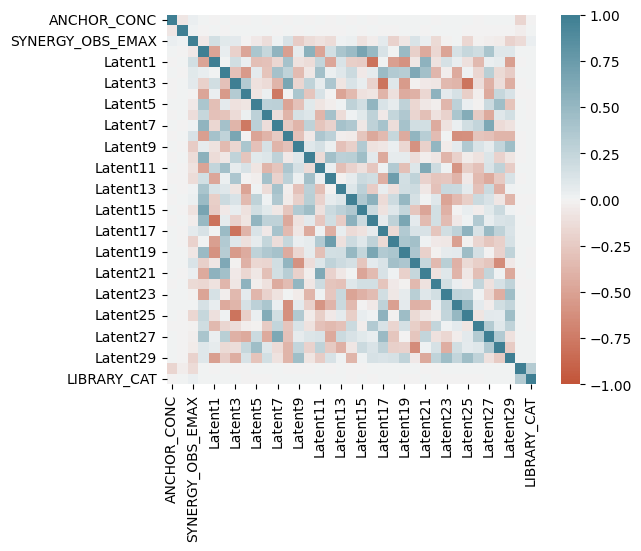

In [11]:
ax = sns.heatmap(res, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

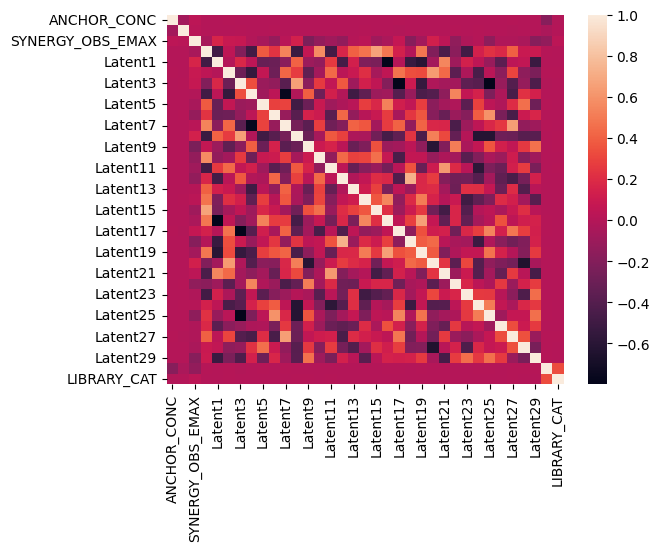

In [7]:
#plotting the heatmap for correlation
ax = sns.heatmap(finaldata.corr())